In [9]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import scipy

In [230]:
def imp_est(tj, tk, n_sims, thresh, key):
    _, key = jax.random.split(key)
    xs = jax.random.normal(key, shape=(n_sims,)) + tk
    rejs = xs > thresh
    dratio = jnp.exp((tj - tk) * xs - 0.5 * (tj**2 - tk**2))
    print(dratio)
    drr = dratio * rejs
    return jnp.mean(drr), jnp.std(drr, ddof=1) 

In [218]:
theta_j = 0
theta_ks = jnp.linspace(-1, 20, 50)
n_sims = 100000
alpha = 0.025
thresh = scipy.stats.norm.isf(alpha)
true_TIE = scipy.stats.norm.sf(thresh - theta_j)
key = jax.random.PRNGKey(69)
keys = jax.random.split(key, theta_ks.shape[0])

In [236]:
imp_est(theta_j, 9, n_sims, thresh, key)

[5.4113768e-22 1.5484027e-18 1.0163562e-15 ... 1.5287395e-20 8.3412788e-21
 2.7072698e-16]


(Array(9.103811e-06, dtype=float32), Array(0.00215202, dtype=float32))

In [219]:
imp_est_j = jax.jit(
    jax.vmap(imp_est, in_axes=(None, 0, None, None, 0)), 
    static_argnums=(2,)
)

In [220]:
imps = imp_est_j(theta_j, theta_ks, n_sims, thresh, keys)

(0.0, 0.05)

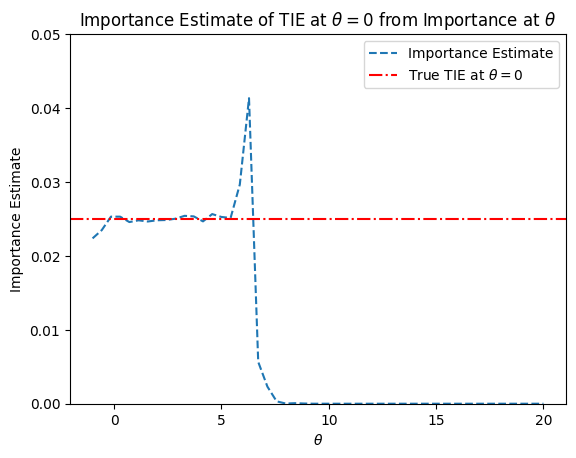

In [229]:
plt.plot(theta_ks, imps[0], linestyle='--', label="Importance Estimate")
plt.axhline(true_TIE, color='r', linestyle='-.', label="True TIE at $\\theta=0$")
plt.title("Importance Estimate of TIE at $\\theta=0$ from Importance at $\\theta$")
plt.xlabel("$\\theta$")
plt.ylabel("Importance Estimate")
plt.legend()
plt.ylim((0, 0.05))

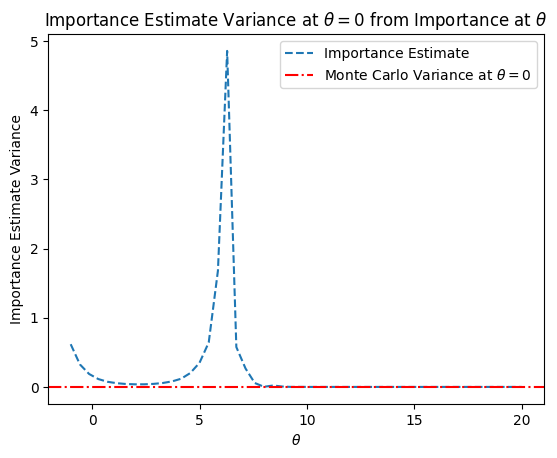

In [247]:
plt.plot(theta_ks, imps[1], linestyle='--', label="Importance Estimate")
plt.axhline(np.sqrt(true_TIE * (1-true_TIE) / n_sims), color='r', linestyle='-.', label="Monte Carlo Variance at $\\theta=0$")
plt.title("Importance Estimate Variance at $\\theta=0$ from Importance at $\\theta$")
plt.xlabel("$\\theta$")
plt.ylabel("Importance Estimate Variance")
plt.legend()

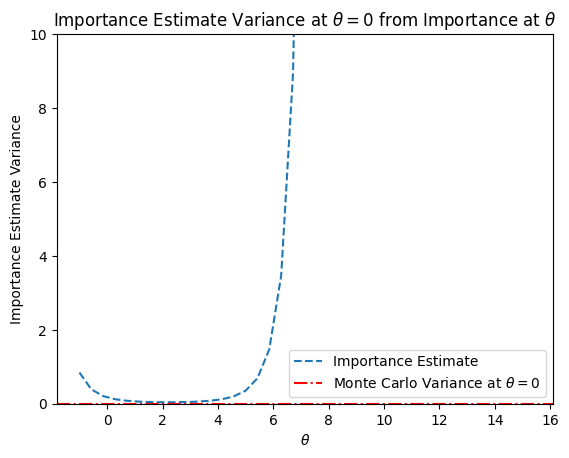

In [251]:
#vars = (1 - jax.scipy.stats.norm.cdf(thresh + theta_ks)) * jnp.exp(theta_ks ** 2) - alpha ** 2
vars = 1/((thresh + theta_ks) * jnp.sqrt(2 * jnp.pi)) * jnp.exp(theta_ks**2/2 - thresh * theta_ks - thresh**2/2) - alpha**2
stddevs = jnp.sqrt(vars)
plt.plot(theta_ks, stddevs, linestyle='--', label="Importance Estimate")
plt.axhline(np.sqrt(true_TIE * (1-true_TIE) / n_sims), color='r', linestyle='-.', label="Monte Carlo Variance at $\\theta=0$")
plt.title("Importance Estimate Variance at $\\theta=0$ from Importance at $\\theta$")
plt.xlabel("$\\theta$")
plt.ylabel("Importance Estimate Variance")
plt.ylim((0, 10))
plt.legend()